<a href="https://colab.research.google.com/github/khuiqian21/BT4012-Group-7-Insurance-Fraud-Detection-with-Machine-Learning/blob/main/BT4012_Final_Project_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive

Correlation Matrix:

              proba_xgb  proba_rf  proba_logreg  proba_mlp
proba_xgb         1.000     0.888         0.919      0.928
proba_rf          0.888     1.000         0.924      0.871
proba_logreg      0.919     0.924         1.000      0.943
proba_mlp         0.928     0.871         0.943      1.000


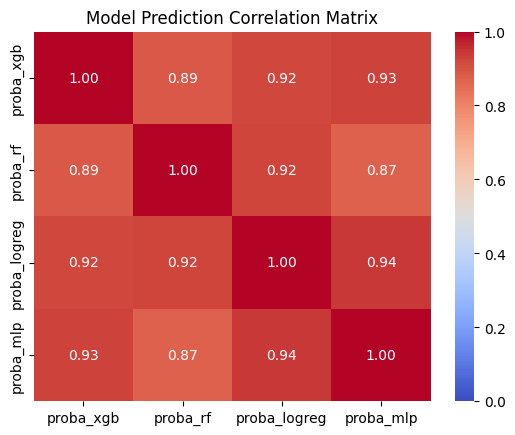

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# 0. Mount Google Drive and set base directory
drive.mount('/content/drive')
path = "/content/drive/MyDrive/bt4012/"

# 1. Load model prediction CSVs

xgb = pd.read_csv(path + "xgb_val_pred.csv").rename(columns={"y_val_proba": "proba_xgb"})
rf = pd.read_csv(path + "rf_val_pred.csv").rename(columns={"y_val_proba": "proba_rf"})
logreg = pd.read_csv(path + "logreg_val_pred.csv").rename(columns={"y_val_proba": "proba_logreg"})
mlp = pd.read_csv(path + "mlp_val_pred.csv").rename(columns={"y_val_proba": "proba_mlp"})
# lgbm = pd.read_csv(path + "lgbm_val_pred.csv").rename(columns={"y_val_proba": "proba_lgbm"})

# 2. Concatenate all by index (no 'id' column)
merged = pd.concat([xgb, rf, logreg, mlp], axis=1)

# 3. Compute correlation matrix
corr = merged.corr()

# 4. Visualise correlation matrix
print("\nCorrelation Matrix:\n")
print(corr.round(3).to_string())
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=0, vmax=1, fmt=".2f")
plt.title("Model Prediction Correlation Matrix")
plt.show()
